## Step 1: Represent the input
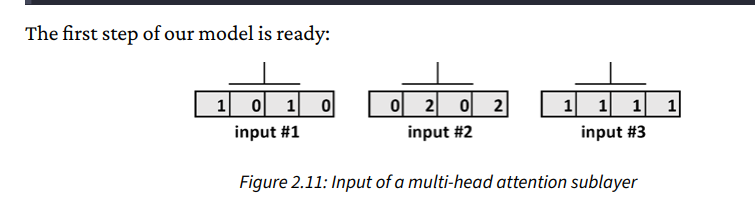

In [22]:
import numpy as np
from scipy.special import softmax

In [23]:
print("Step 1: Input : 3 inputs, d_model=4")
x =np.array([[1.0, 0.0, 1.0, 0.0], # Input 1
 [0.0, 2.0, 0.0, 2.0], # Input 2
 [1.0, 1.0, 1.0, 1.0]]) # Input 3
print(x)

Step 1: Input : 3 inputs, d_model=4
[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


## Step 2: Initializing the weight matrices

In [24]:
print("Step 2: weights 3 dimensions x d_model=4")
print("w_query")
w_query =np.array([[1, 0, 1],
 [1, 0, 0],
 [0, 0, 1],
 [0, 1, 1]])
print(w_query)

Step 2: weights 3 dimensions x d_model=4
w_query
[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]


In [25]:
print("w_key")
w_key =np.array([[0, 0, 1],
 [1, 1, 0],
 [0, 1, 0],
 [1, 1, 0]])
print(w_key)

w_key
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]


In [26]:
print("w_value")
w_value = np.array([[0, 2, 0],
 [0, 3, 0],
 [1, 0, 3],
 [1, 1, 0]])
print(w_value)

w_value
[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


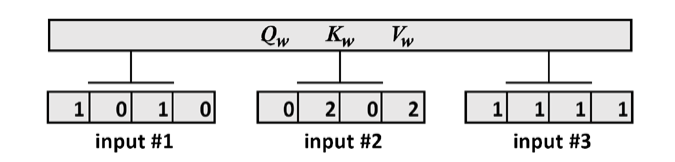

## Step 3: Matrix multiplication to obtain Q, K, and V


In [27]:
print("Step 3: Matrix multiplication to obtain Q,K,V")
print("Query: x * w_query")
Q=np.matmul(x,w_query)
print(Q)

Step 3: Matrix multiplication to obtain Q,K,V
Query: x * w_query
[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]


In [28]:
print("Key: x * w_key")
K=np.matmul(x,w_key)
print(K)

Key: x * w_key
[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]


In [29]:
print("Value: x * w_value")
V=np.matmul(x,w_value)
print(V)

Value: x * w_value
[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


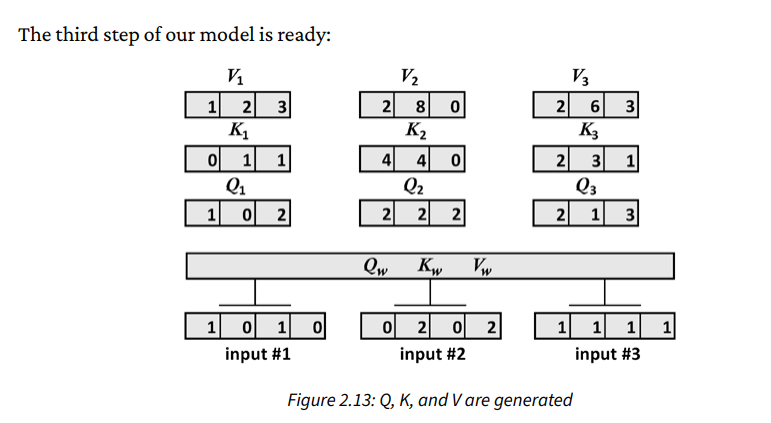

## Step 4: Scaled attention scores

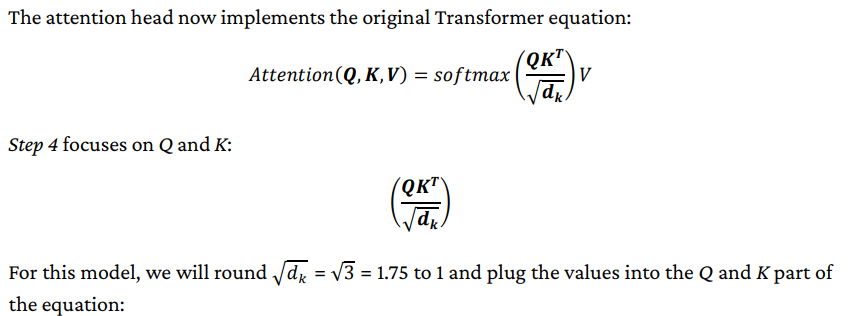

In [30]:
print("Step 4: Scaled Attention Scores")
k_d=1 #square root of k_d=3 rounded down to 1 for this example
attention_scores = (Q @ K.transpose())/k_d
print(attention_scores)

Step 4: Scaled Attention Scores
[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


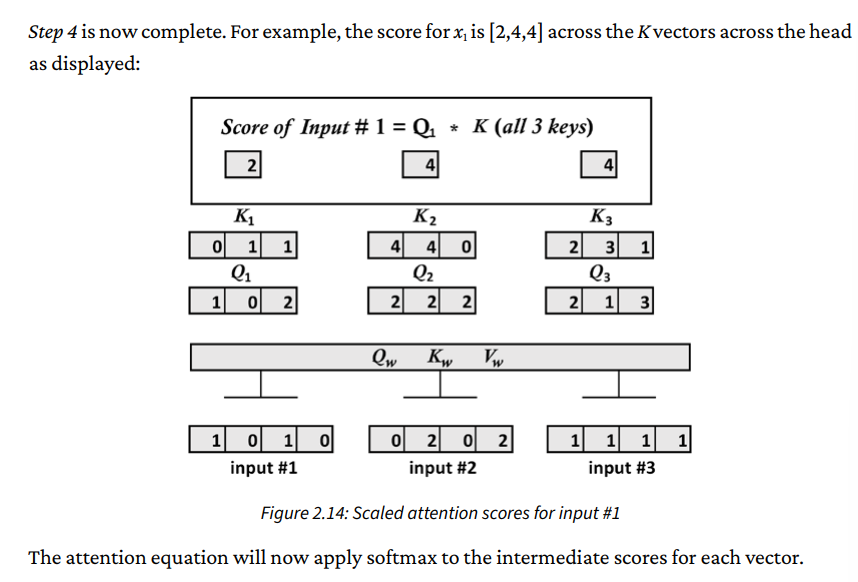

## Step 5: Scaled softmax attention scores for each vector


In [31]:
print("Step 5: Scaled softmax attention_scores for each vector")
attention_scores[0]=softmax(attention_scores[0])
attention_scores[1]=softmax(attention_scores[1])
attention_scores[2]=softmax(attention_scores[2])
print(attention_scores[0])
print(attention_scores[1])
print(attention_scores[2])

Step 5: Scaled softmax attention_scores for each vector
[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


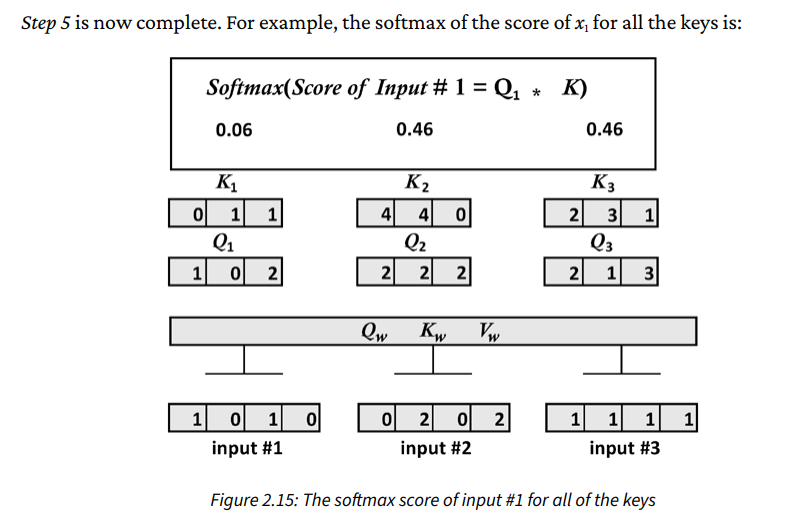

## Step 6: The final attention representations


In [32]:
print("Step 6: attention value obtained by score1/k_d * V")
print(V[0])
print(V[1])
print(V[2])
print("Attention 1")
attention1=attention_scores[0].reshape(-1,1)
attention1=attention_scores[0][0]*V[0]
print(attention1)
print("Attention 2")
attention2=attention_scores[0][1]*V[1]
print(attention2)
print("Attention 3")
attention3=attention_scores[0][2]*V[2]
print(attention3)



Step 6: attention value obtained by score1/k_d * V
[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]
Attention 1
[0.06337894 0.12675788 0.19013681]
Attention 2
[0.93662106 3.74648425 0.        ]
Attention 3
[0.93662106 2.80986319 1.40493159]


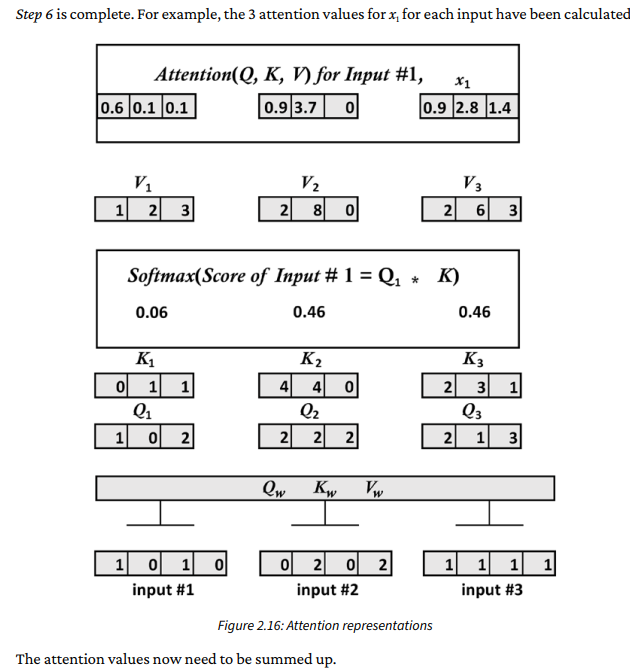

## Step 7: Summing up the results


In [33]:
print("Step 7: summed the results to create the first line of the output matrix")
attention_input1=attention1+attention2+attention3
print(attention_input1)

Step 7: summed the results to create the first line of the output matrix
[1.93662106 6.68310531 1.59506841]


## Step 8: Steps 1 to 7 for all the inputs
The Transformer can now produce the attention values of input #2 and input #3 using the same
method described from Step 1 to Step 7 for one attention head.
From this step onwards, we will assume we have 3 attention values with learned weights with
dmodel = 64. We now want to see what the original dimensions look like when they reach the sublayer’s output.
We have seen the attention representation process in detail with a small model. Let’s go directly
to the result and assume we have generated the 3 attention representations with a dimension
of dmodel = 64:

In [34]:
print("Step 8: Step 1 to 7 for inputs 1 to 3")
#We assume we have 3 results with learned weights (they were not trained
## in this example) 
#We assume we are implementing the original Transformer paper.We will have
# 3 results of 64 dimensions each
attention_head1=np.random.random((3, 64))
print(attention_head1)

Step 8: Step 1 to 7 for inputs 1 to 3
[[0.44419362 0.98372951 0.17569287 0.3953725  0.28257833 0.7346275
  0.68905159 0.93300949 0.87276346 0.34052217 0.17205734 0.24848777
  0.72582702 0.499132   0.90607601 0.73834078 0.27245376 0.78527941
  0.47685694 0.42008985 0.42172302 0.27699479 0.82051558 0.53522045
  0.64827299 0.95775061 0.88631622 0.88759396 0.56602039 0.8381926
  0.27922412 0.14652387 0.93202871 0.27055173 0.44331743 0.72164618
  0.13998223 0.4264877  0.42000299 0.35182128 0.17565032 0.29869291
  0.56158488 0.88076495 0.32761687 0.05795208 0.15928503 0.01164702
  0.07346194 0.67090813 0.76199406 0.13390738 0.33620063 0.56871056
  0.57530595 0.50089482 0.76871525 0.25576826 0.6747635  0.37378434
  0.02399177 0.11005938 0.79437499 0.32828601]
 [0.02848176 0.00684275 0.44921526 0.69091069 0.81110169 0.50619699
  0.28184669 0.53323004 0.30570646 0.99708018 0.26383574 0.3544084
  0.75057985 0.79411179 0.79945578 0.25853086 0.39097371 0.50638262
  0.46875538 0.55155809 0.36526355

## Step 9: The output of the heads of the attention sublayer 


In [35]:
print("Step 9: We assume we have trained the 8 heads of the attention sublayer")
z0h1=np.random.random((3, 64))
z1h2=np.random.random((3, 64))
z2h3=np.random.random((3, 64))
z3h4=np.random.random((3, 64))
z4h5=np.random.random((3, 64))
z5h6=np.random.random((3, 64))
z6h7=np.random.random((3, 64))
z7h8=np.random.random((3, 64))
print("shape of one head",z0h1.shape,"dimension of 8 heads",64*8)

Step 9: We assume we have trained the 8 heads of the attention sublayer
shape of one head (3, 64) dimension of 8 heads 512


## Step 10: Concatenation of the output of the heads

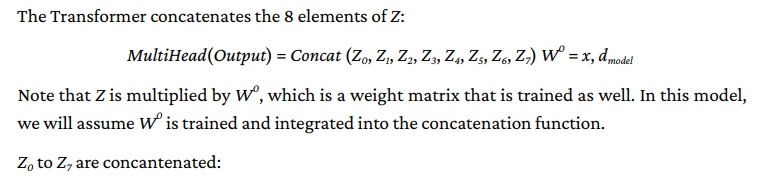

In [36]:
print("Step 10: Concantenation of heads 1 to 8 to obtain the original 8x64=512 ouput dimension of the model")
output_attention=np.hstack((z0h1,z1h2,z2h3,z3h4,z4h5,z5h6,z6h7,z7h8))
print(output_attention)

Step 10: Concantenation of heads 1 to 8 to obtain the original 8x64=512 ouput dimension of the model
[[0.7201557  0.98577889 0.1796657  ... 0.75410905 0.75070736 0.9449402 ]
 [0.78005769 0.07649216 0.21942781 ... 0.34212481 0.55268756 0.94812034]
 [0.23244494 0.03945169 0.7995938  ... 0.30054598 0.07168177 0.65118189]]
